# An analysis of housing data in King County Washington.

### Presented by: Data Chef Partners

 Objective: To help realtors identify profitable areas in their chosen county so they can help their customers buy or sell with confidence<br>
Families:
- Get more hose for their money
- Make an investment for future gains 
- Possible rental opportunities<br>
Contractors
- identify hotspots flip opportunities
- identify areas of future development
- Find customers looking to rennovate


In [1]:
# Setting up the workspace by importing all of the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import folium
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# Loading the data and getting a first look at it's structure and contents
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
# Taking a look at the types of data and the information about the different columns
# Identifying extraneous values that may need to be removed or altered for cleaner processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Initial Data impressions:<br>
- __*id*__ is simply an identifier<br>
    This will be removed as it is not pertinent to the data analysis.<br>
- __*date*__ is a string.<br>
    Our initial impression is that it is simply the date that row was entered into the database.<br>
    This should be converted to a numerical value if it is a key data point.<br>
- There are two columns related to the size, __*sqft_living and sqft_lot*__ <br>
    We will explore their relationship and determine if they are dependent on each other or not<br>
- __*floors*__ is a numerical value.<br>
    Based on our knowledge of houses we believe this may be better suited to a categorical value.<br>
    We will explore the data and convert it to either a single or multiple<br> 
    or decide if each value of floors needs it's own category.<br>
- __*waterfront*__ is definitely categorical sine a home can only be either on or off the water.<br>
    We will convert this to a binary value to represent either on or off the water.<br>
- __*sqft_basement*__ <br>
    This along with __*sqft_above*__ combined are the same as __*sqft_living*__ so we will drop it<br>
    from the dataset since the presence of a basement is more significant than the size.<br>
    'sqft_basement will then be converted to categories which will identify the presence of a basement<br>
- __*zipcode*__ and __*lat long*__ are both location data.<br>
    We will determine if both are necessary and treat them accordingly<br>
- __*yr_renovated*__ has many null values so they will be replaced<br>


### Scrubbing the Data!!

*Waterfront*

In [5]:
# 'waterfront' is either True "1" or False "0".
# here we are changing all of the Null values to 0 to facilitate this
df.waterfront = df.waterfront.fillna(0)

*ID*

In [6]:
# 'id' is an arbitrary value which is unnecesary for analysis
# here we are removing it from the dataset
df.drop(['id'], axis=1, inplace=True)


*View*

In [7]:
# 'view' has some null values, so we will replace those with the assumption
#  that the null values represent the property not being viewed.
df.view = df['view'].fillna(0)

   *Sqft_basement*

In [8]:
# 'sqft_basement' has some placeholders. Here we are removing those
# This also needs to be converted to numerical values for analysis
# 'sqft_above' is arbitrary since it is included in 'sqft_living' so will drop it
df.sqft_basement.replace(to_replace='?', value='0', inplace=True)
df.sqft_basement = df.sqft_basement.convert_objects(convert_numeric=True)
df.drop(['sqft_above'], axis=1, inplace=True)

In [9]:
# We found one record that did not have valid data, so this was dropped.
df.drop(index=15856, inplace=True)

In [10]:
# 'yr_renovated' has some placeholders so we are converting them to '0'
df.yr_renovated = df['yr_renovated'].fillna(0)

In [11]:
df.dropna(inplace=True)
df.drop(['date'], axis=1, inplace=True)

### Looking over the Clean, Shiny Data.

In [12]:
# Taking an initial look at the basic statistics of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 18 columns):
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(9), int64(9)
memory usage: 3.1 MB


### Creating our Working file and beginning to look at the numbers

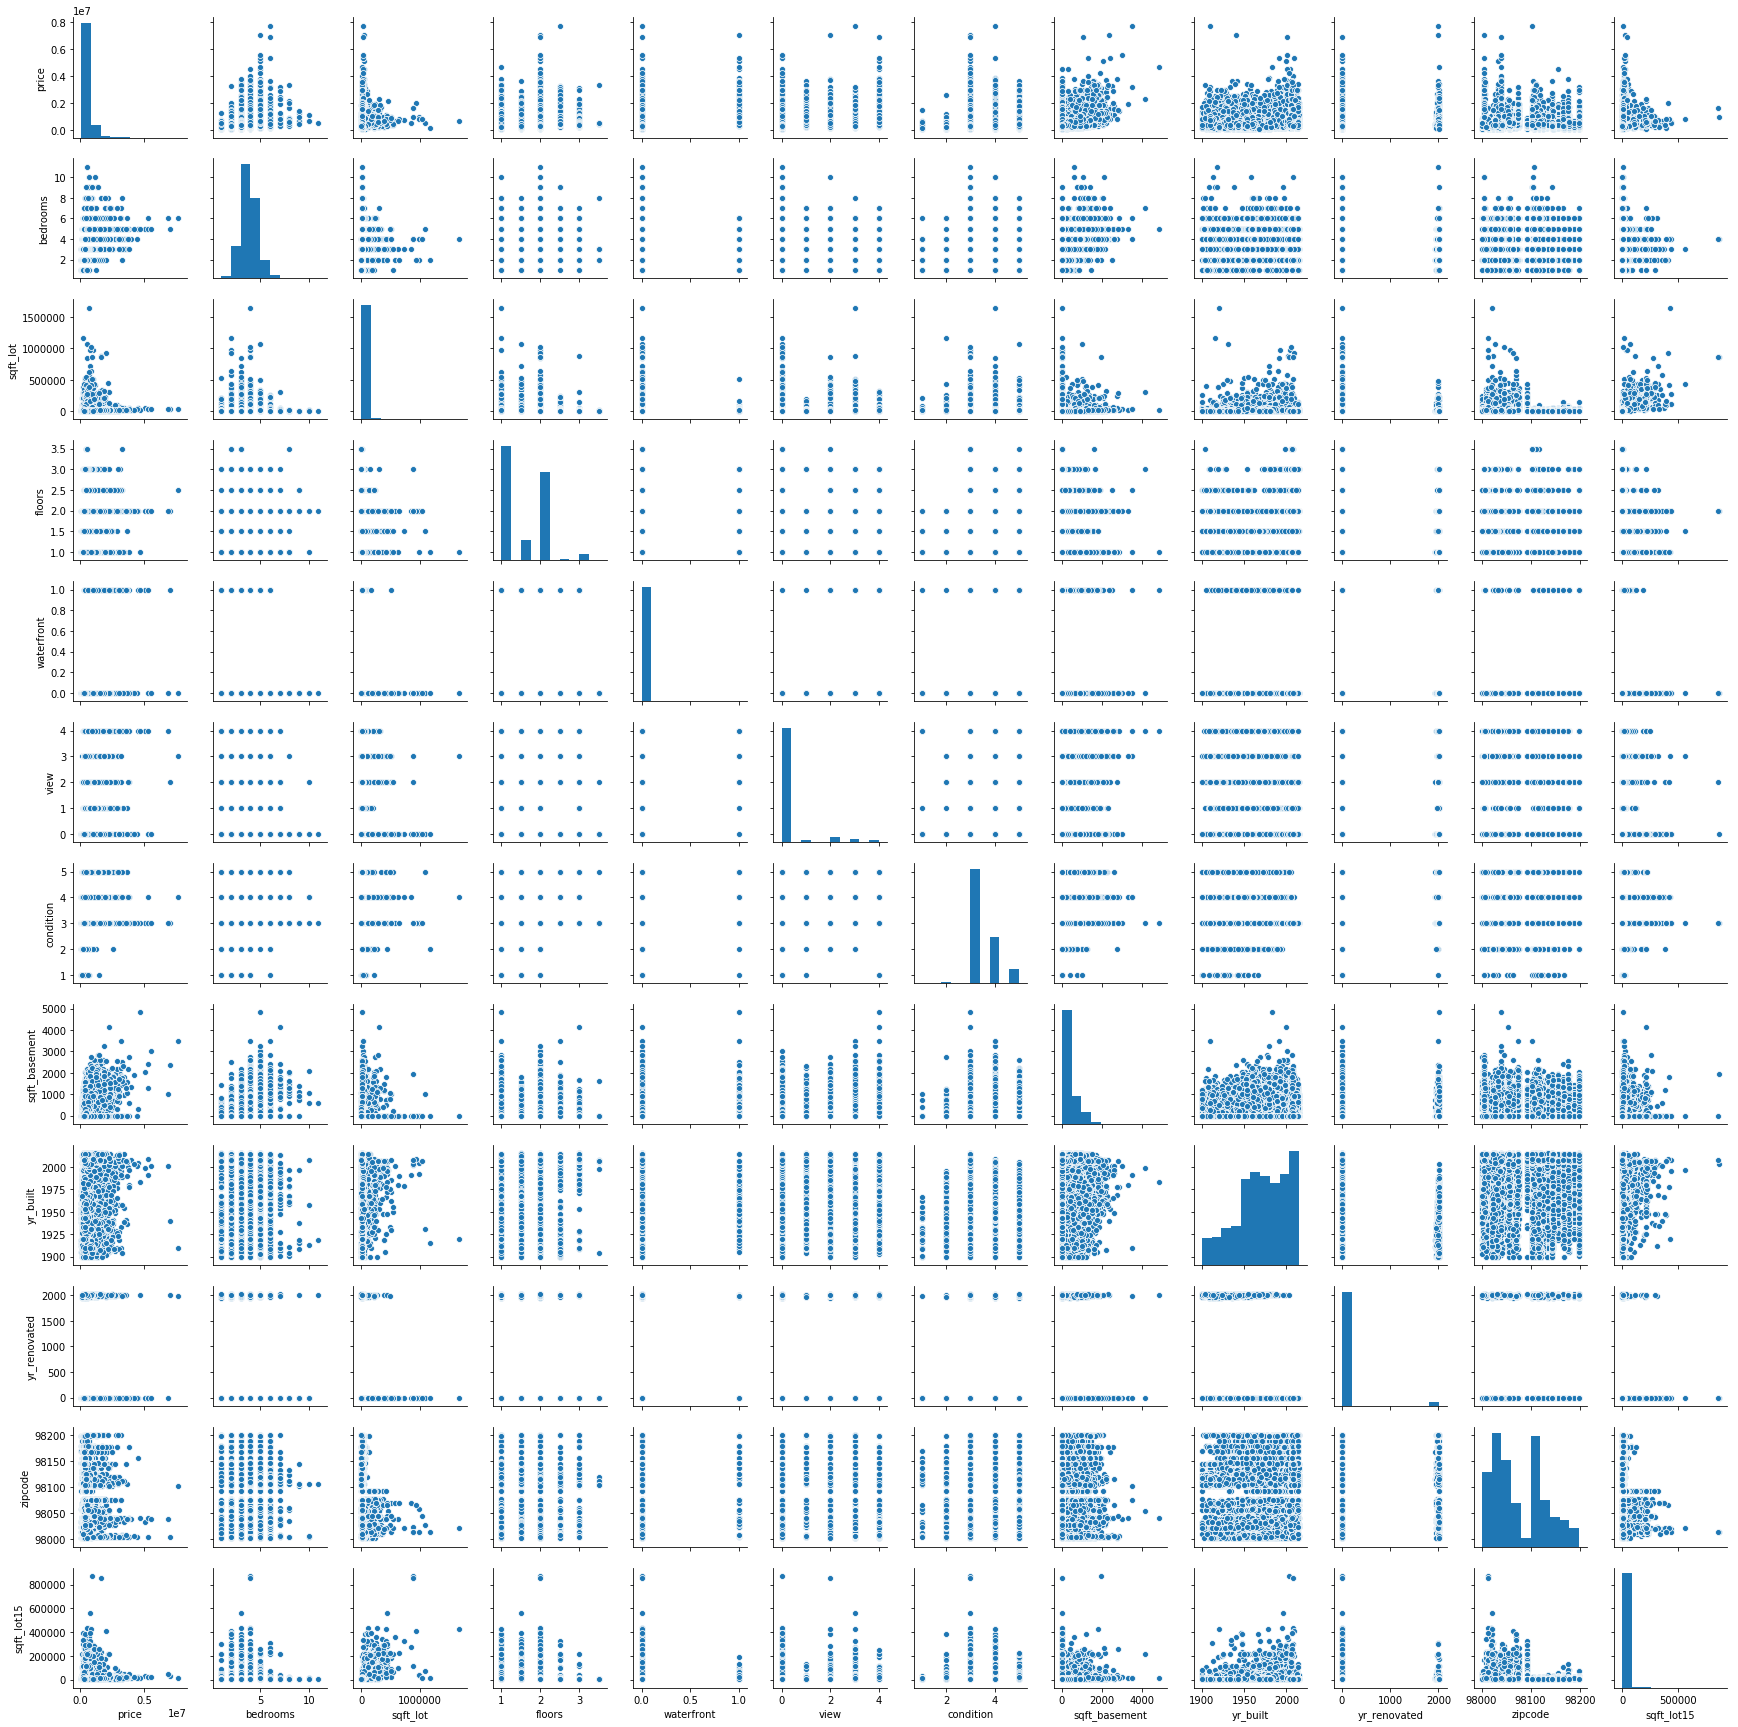

In [83]:
df_working = df
sns.pairplot(df_working, height=2)



### Looking at the plots above, we have determined that we will look further into:
- __*bathrooms*__
- __*sqft_living*__
- __*bedrooms*__
- __*lat & long*__ <br>
as they relate to our target __*price*__

### Now to check for Mulitcolilnearity
 using the Pearson test, we can look for high correlation between two variables<br>
 to determine if they represent the same data.<br> 
 We will look at the values at 75% or higher and determine if we should drop one 

In [14]:
df_working.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,0.321103,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,0.083053,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,0.270641,-0.054464,0.090337,0.085066,0.006334,-0.077715,0.278921,0.073079
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,0.168431,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,0.249077,-0.146854,1.000000,0.165863,0.447854,0.015618,-0.185761,0.113602,0.200324,0.713863,0.120974


In [15]:
abs(df_working.corr()) >.75


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


- It looks like grade may be correlated with 'sqft_living', but this relationship should be expected
- 'bathrooms' and 'sqft_living15' seem to be correlated.<br>
  upon further inspection it seems to indicate that 'sqft_living15' may be the size before remodeling and sqft_living is     the current size.<br>
  We will look at this closer<br>
- It looks like 'lat' and 'long' may have some importance, but they need to be used together.<br>
  We will separate them out for further inspection.

In [ ]:
y = df['price']
x = df[['bedrooms', 'sqft_living15', 'lat']]

In [16]:
y = df_working['price']
x = df_working.drop(['price'], axis=1)
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2967.
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:26:48   Log-Likelihood:            -2.9436e+05
No. Observations:               21596   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.889e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.451e+06   2.93e+06      2.545      0.011    1.71e+06    1.32e+07
bedrooms      -3.934e+04   1979.512    -19.872      0.000   -4.32e+04   -3.55e+04
bathrooms      4.209e+04   3263.102     12.899      0.000    3.57e+04    4.85e+04
sqft_living     181.2885      3.673     49.358      0.000     174.089     188.488
sqft_lot          0.1288      0.048      2.689      0.007       0.035       0.223
floors         8569.4926   3578.359      2.395      0.017    1555.645    1.56e+04
waterfront     6.179e+05   1.81e+04     34.085      0.000    5.82e+05    6.53e+05
view           5.268e+04   2120.160     24.848      0.000    4.85e+04    5.68e+04
condition      2.643e+04   2344.169     11.275      0.000    2.18e+04     3.1e+04
grade          9.663e+04   2160.649     44.723      0.000    9.24e+04    1.01e+05
sqft_basement   -27.3526      4.319     -6.334      0.000     -35.817     -18.888
yr_built      -2647.2762     71.919    -36.809      0.000   -2788.243   -2506.309
yr_renovated     23.2114      3.976      5.838      0.000      15.419      31.004
zipcode        -588.6542     32.978    -17.850      0.000    -653.294    -524.014
lat            5.985e+05   1.07e+04     55.770      0.000    5.78e+05     6.2e+05
long          -2.156e+05   1.31e+04    -16.406      0.000   -2.41e+05    -1.9e+05
sqft_living15    22.2873      3.445      6.470      0.000      15.535      29.039
sqft_lot15       -0.3958      0.073     -5.398      0.000      -0.540      -0.252
==============================================================================
Omnibus:                    18306.322   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1827717.651
Skew:                           3.551   Prob(JB):                         0.00
Kurtosis:                      47.505   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
def make_model(df, target='price', features=['sqft_living'], add_constant=False):
    x = df[features]
    if add_constant == True:
        x = sm.add_constant(x)
    y = df[target]
    ols = sm.OLS(y, x)
    res = ols.fit()
    print(res.summary())
    return ols, res
    

In [92]:
make_model(df2, features=['sqft_living', 'bathrooms', 'lat'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 3.767e+04
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:00:55   Log-Likelihood:            -3.0007e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   283.9607      2.962     95.863      

(<statsmodels.regression.linear_model.OLS at 0x1d99caa3080>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1d99caa3240>)

In [17]:
df_loc = df_working[['lat', 'long']].copy()
df_working.drop(['lat', 'long'], axis=1, inplace=True)

In [18]:
df_working.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,1800,7503


### Looking for and removing Multi_Colinearity

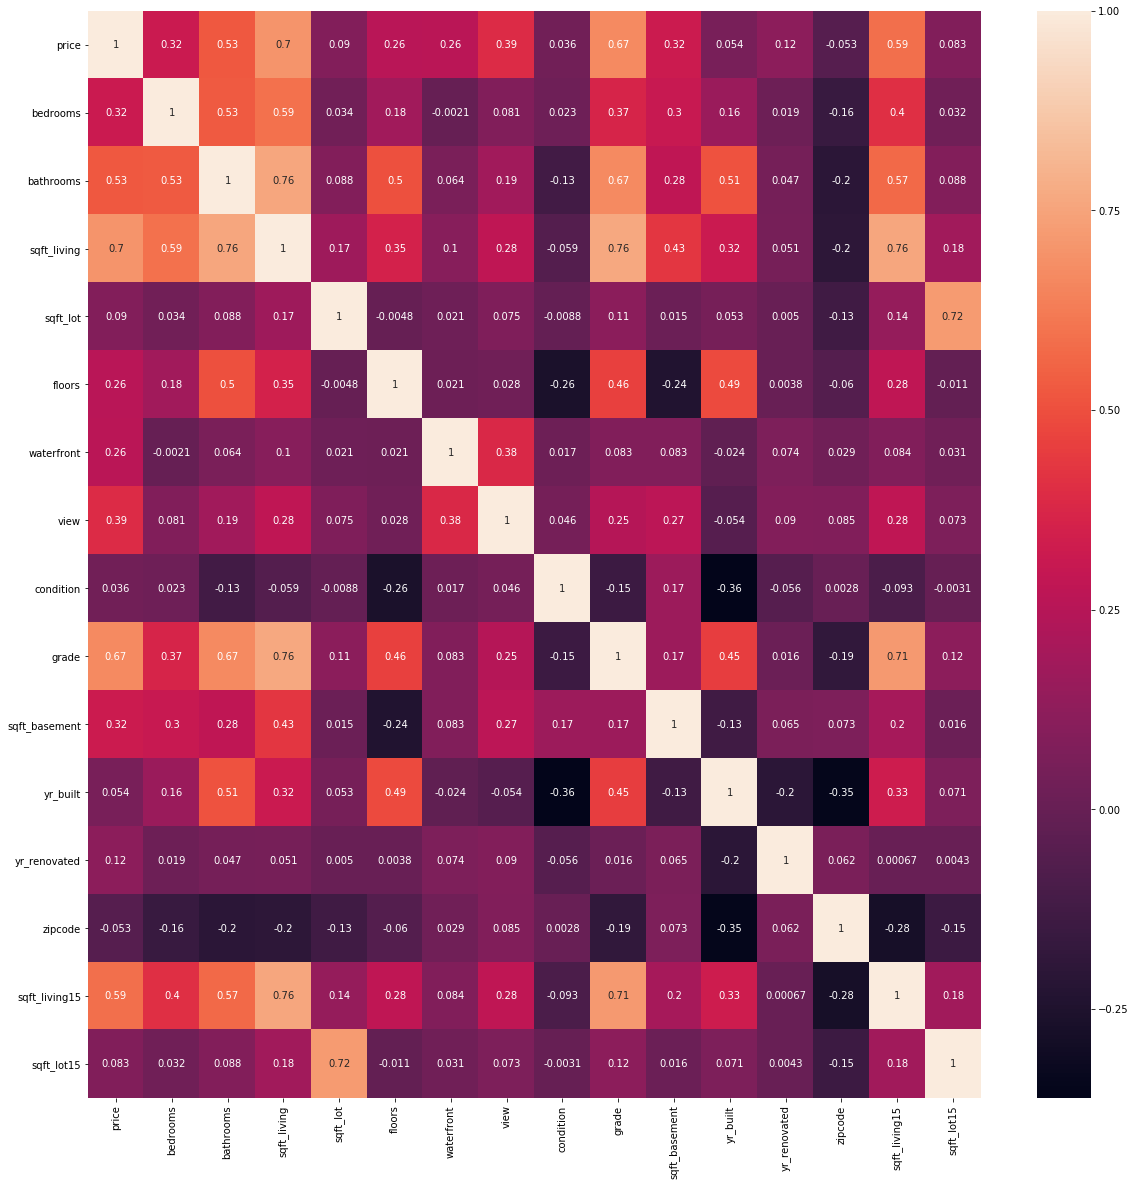

In [19]:
corr = df_working.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,)
plt.show()

Based on the above heatmap, we have determined:<br>
__*'sqft_living'*__ and __*'bathrooms*__ are highly correlated so we will combine them into one feature<br>
 
__*grade*__ also seems to have high correlation with other variables, so we will combine it with __*sqft_living15*__<br>

In [20]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*df_working.grade + weight2*df_working.sqft_living15
    corr_coeff = np.abs(np.corrcoef(vals, df_working.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

df_sqft_grade = pd.DataFrame()
df_sqft_grade = (desired_weights[0]*df_working.grade + desired_weights[1]*df_working.sqft_living15).astype(dtype='int32')

In [21]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*df_working.bathrooms + weight2*df_working.sqft_living
    corr_coeff = np.abs(np.corrcoef(vals, df_working.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

df_sqft_bath = pd.DataFrame()
df_sqft_bath = (desired_weights[0]*df_working.bathrooms + desired_weights[1]*df_working.sqft_living).astype(dtype='int32')

In [86]:
df.head()

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,sqft_lot15
0,221900.0,3,5650,1.0,0.0,0.0,3,0.0,1955,0.0,98178,5650
1,538000.0,3,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,7639
2,180000.0,2,10000,1.0,0.0,0.0,3,0.0,1933,0.0,98028,8062
3,604000.0,4,5000,1.0,0.0,0.0,5,910.0,1965,0.0,98136,5000
4,510000.0,3,8080,1.0,0.0,0.0,3,0.0,1987,0.0,98074,7503


In [85]:
df_working["sqft_bath"] = desired_weights[0]*df_working.bathrooms + desired_weights[2] * df_working.sqft_living

AttributeError: 'DataFrame' object has no attribute 'bathrooms'

In [21]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*df_working.bathrooms + weight2*df_working.sqft_living
    corr_coeff = np.abs(np.corrcoef(vals, df_working.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

df_sqft_bath = pd.DataFrame()
df_sqft_bath = (desired_weights[0]*df_working.bathrooms + desired_weights[1]*df_working.sqft_living).astype(dtype='int32')

In [46]:
df_sqft_bath.rename(index={0:'sqft_bath'}, inplace=True)
df_sqft_grade.rename(index={0:'sqft_grade'}, inplace=True)


df_sqft_bath.fillna(0)
df_sqft_grade.fillna(0)
print(df_sqft_bath.head())
print(df_sqft_grade.head())


sqft_bath    1180
1            2570
2             770
3            1960
4            1680
dtype: int32
sqft_grade    7
1             8
2             7
3             7
4             9
dtype: int32


,price,log_sqft_lot,log_yr_built,bed1,bed2,bed4,flor1,flor2,vw1,vw2,vw4,vw5,water1,cond2,cond3,cond4,sqft_bath,sqft_grade
0,221900.0,0.295858,0.485598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1,538000.0,0.326644,0.450745,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2570.0,8.0
2,180000.0,0.366664,0.293018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,770.0,7.0
3,604000.0,0.280700,0.572419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1960.0,7.0
4,510000.0,0.340224,0.761879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1680.0,9.0


In [23]:
df_working.drop(['sqft_living', 'sqft_living15', 'grade', 'bathrooms'], axis=1, inplace=True);

In [24]:
# lat = 47.560093
# long = -122.213982
# base_map = folium.Map([lat, long], zoom_start=10)
# for index, row in df_loc.iterrows():
#     lat = row['lat']
#     long = row['long']
#     marker = folium.Marker(location=[lat, long])
#     marker.add_to(base_map)
# base_map


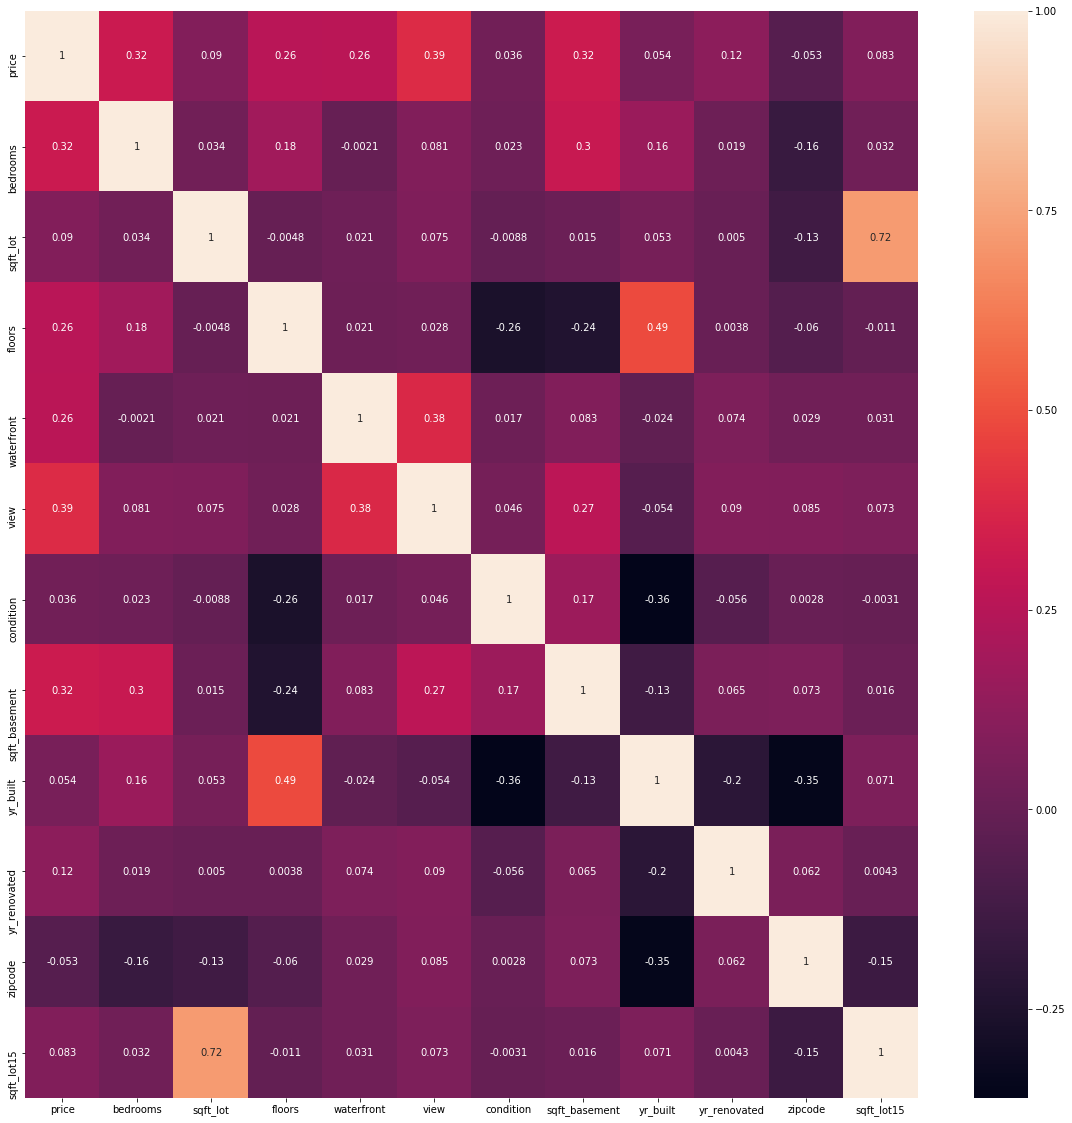

In [25]:
#checking to see if there are any noticeable changes
corr = df_working.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,)
plt.show()

- It looks like we got rid of the multicolinearity.

In [87]:
df2 = pd.read_csv("kc_house_data.csv")
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [26]:
#Creating a dataset of our desired features
dff = df_working
dff.head()

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,sqft_lot15
0,221900.0,3,5650,1.0,0.0,0.0,3,0.0,1955,0.0,98178,5650
1,538000.0,3,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,7639
2,180000.0,2,10000,1.0,0.0,0.0,3,0.0,1933,0.0,98028,8062
3,604000.0,4,5000,1.0,0.0,0.0,5,910.0,1965,0.0,98136,5000
4,510000.0,3,8080,1.0,0.0,0.0,3,0.0,1987,0.0,98074,7503


In [27]:
target = 'price'
x_cols = dff.drop('price', axis=1).columns
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=dff).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     1108.
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:27:55   Log-Likelihood:            -3.0254e+05
No. Observations:               21596   AIC:                         6.051e+05
Df Residuals:                   21584   BIC:                         6.052e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.534e+07   4.15e+06     13.329      0.000    4.72e+07    6.35e+07
bedrooms       6.296e+04   2464.686     25.546      0.000    5.81e+04    6.78e+04
sqft_lot          0.3653      0.069      5.257      0.000       0.229       0.501
floors         2.251e+05   4582.281     49.113      0.000    2.16e+05    2.34e+05
waterfront     6.244e+05   2.64e+04     23.623      0.000    5.73e+05    6.76e+05
view           1.146e+05   2963.501     38.682      0.000    1.09e+05     1.2e+05
condition      1.876e+04   3408.243      5.504      0.000    1.21e+04    2.54e+04
sqft_basement   218.7706      5.295     41.319      0.000     208.393     229.149
yr_built      -1132.6778     91.405    -12.392      0.000   -1311.838    -953.518
yr_renovated     53.4757      5.742      9.314      0.000      42.222      64.729
zipcode        -543.3074     41.614    -13.056      0.000    -624.875    -461.740
sqft_lot15        0.2780      0.106      2.627      0.009       0.071       0.485
==============================================================================
Omnibus:                    17062.911   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           983629.101
Skew:                           3.347   Prob(JB):                         0.00
Kurtosis:                      35.378   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now let's separate the data into categorical and continuous


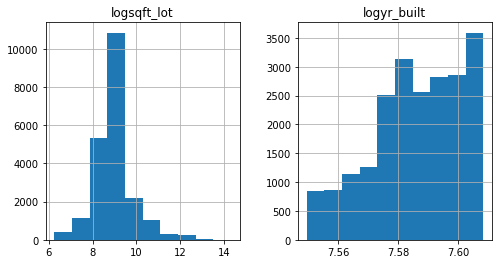

In [28]:
# Much of the coninuous data seems to be very skewed.  
# We will perform a log transformation in an effort to normalize the data
data_log = pd.DataFrame([])
data_log["logsqft_lot"] = np.log(df_working["sqft_lot"])
#data_log["logsqft_living"] = np.log(df_working["sqft_living"])
data_log["logyr_built"] = np.log(df_working["yr_built"])
# data_log["loggrade"] = np.log(df_working["grade"])
data_log.hist(figsize  = [8, 4]);

In [29]:
log_sqft_lot = data_log['logsqft_lot']
#log_sqft_living = data_log['logsqft_living']
log_yr_built = data_log['logyr_built']

scaled_log_sqft_lot = (log_sqft_lot-min(log_sqft_lot))/(max(log_sqft_lot)-min(log_sqft_lot))
#scaled_log_sqft_living = (log_sqft_living-min(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))
scaled_log_yr_built = (log_yr_built-min(log_yr_built))/(max(log_yr_built)-min(log_yr_built))

In [30]:
data_cont_scaled = pd.DataFrame([])
data_cont_scaled["log_sqft_lot"]= scaled_log_sqft_lot
# data_cont_scaled["log_sqft_living"] = scaled_log_sqft_living
data_cont_scaled["log_yr_built"] = scaled_log_yr_built

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9937BBB70>,
      dtype=object)

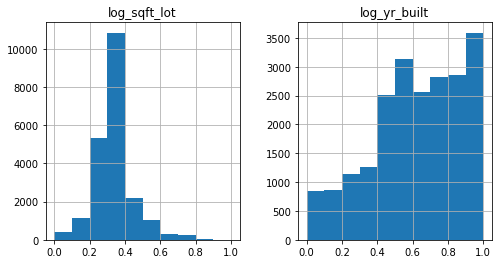

In [31]:
data_cont_scaled.hist(figsize  = [8,4])

#### This seems to have made a difference in the data.

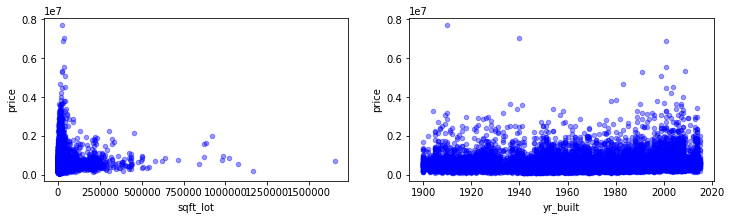

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

for xcol, ax in zip(['sqft_lot', 'yr_built'], axes):
    dff.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    


### From this plot, we have learned<br>
- __*'sqft_living'*__ will be a good predictor<br>
- __*'Sqft_lot'*__ may be affecting the results adversely<br>
- __*'bedrooms'*__ looks significant as well as __*'bathrooms'*__<br>


### There are many categorical variables, so we need to handle those here
- We will change them to categories
- Perform One_Hot encoding to normalize the data

### Here we are dealing with the categorical values and making them easier to work with

In [33]:
df_cat = pd.DataFrame([])
#df_cat['bathrooms'] = df_working['bathrooms'].astype('category')
df_cat['bedrooms'] = df_working['bedrooms'].astype('category')
df_cat['floors'] = df_working['floors'].astype('category')
df_cat['waterfront'] = df_working['waterfront'].astype('category')
df_cat['view'] = df_working['view'].astype('category')
df_cat['condition'] = df_working['condition'].astype('category')
#df_cat['grade'] = df_working['grade'].astype('category')
# df_cat['grade'] = df_working['grade'].astype('category')
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 5 columns):
bedrooms      21596 non-null category
floors        21596 non-null category
waterfront    21596 non-null category
view          21596 non-null category
condition     21596 non-null category
dtypes: category(5)
memory usage: 275.3 KB


In [34]:
#df_cat['bathrooms'].cat.codes
df_cat['bedrooms'].cat.codes
df_cat['floors'].cat.codes
df_cat['waterfront'].cat.codes
df_cat['view'].cat.codes
df_cat['condition'].cat.codes
#df_cat['grade'].cat.codes
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 5 columns):
bedrooms      21596 non-null category
floors        21596 non-null category
waterfront    21596 non-null category
view          21596 non-null category
condition     21596 non-null category
dtypes: category(5)
memory usage: 275.3 KB


In [35]:
# bins = [0, 1, 2, 3, 10]

# bins_bathrooms = pd.cut(df_cat['bathrooms'], bins)
# bins_bathrooms = bins_bathrooms.cat.as_unordered()

In [36]:
bins = [0, 1, 2, 4, 6]

bins_bedrooms = pd.cut(df_cat['bedrooms'], bins)
bins_bedrooms = bins_bedrooms.cat.as_unordered()

In [37]:

bins = [0, 1, 2, 4]

bins_floors = pd.cut(df_cat['floors'], bins)
bins_floors = bins_floors.cat.as_unordered()

In [38]:
bins = [0, 1, 4]

bins_waterfront = pd.cut(df_cat['waterfront'], bins)
bins_waterfront = bins_waterfront.cat.as_unordered()

In [39]:
bins = [0, 1, 2, 4, 5, 7]

bins_view = pd.cut(df_cat['view'], bins)
bins_view = bins_view.cat.as_unordered()

In [40]:
# bins = [0, 3, 4, 5, 9 ]

# bins_grade = pd.cut(df_cat['grade'], bins)
# bins_grade = bins_grade.cat.as_unordered()

In [41]:
bins = [0, 2, 3, 4, 6]

bins_condition = pd.cut(df_cat['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()

In [42]:
#dummy_bathrooms = pd.get_dummies(bins_bathrooms, prefix="BATH", drop_first=True)
dummy_bedrooms = pd.get_dummies(bins_bedrooms, prefix="BED", drop_first=True)
dummy_floors = pd.get_dummies(bins_floors, prefix="FLOR", drop_first=True)
dummy_waterfront = pd.get_dummies(bins_waterfront, prefix="WATER", drop_first=True)
dummy_view = pd.get_dummies(bins_view, prefix="VW", drop_first=True)
dummy_condition = pd.get_dummies(bins_condition, prefix="COND", drop_first=True)
#dummy_grade = pd.get_dummies(bins_grade, prefix="GRAD", drop_first=True)
df_dummy = pd.concat([dummy_bedrooms, dummy_floors, dummy_view, dummy_waterfront, dummy_condition], axis=1) 

In [63]:
df_final = pd.concat([df_working.price, data_cont_scaled, df_dummy, df_sqft_bath, df_sqft_grade], axis=1, )
df_final.to_csv('KC_Data_Final.csv', index=False)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21598 entries, 0 to sqft_grade
Data columns (total 18 columns):
price           21596 non-null float64
log_sqft_lot    21596 non-null float64
log_yr_built    21596 non-null float64
BED_(1, 2]      21596 non-null float64
BED_(2, 4]      21596 non-null float64
BED_(4, 6]      21596 non-null float64
FLOR_(1, 2]     21596 non-null float64
FLOR_(2, 4]     21596 non-null float64
VW_(1, 2]       21596 non-null float64
VW_(2, 4]       21596 non-null float64
VW_(4, 5]       21596 non-null float64
VW_(5, 7]       21596 non-null float64
WATER_(1, 4]    21596 non-null float64
COND_(2, 3]     21596 non-null float64
COND_(3, 4]     21596 non-null float64
COND_(4, 6]     21596 non-null float64
0               21596 non-null float64
1               21596 non-null float64
dtypes: float64(18)
memory usage: 3.1+ MB


### The dummy values created column names which contain characters that do not agree with coding<br>
- they are being modified below.

In [64]:
df_final.rename(columns={'BED_(1, 2]': 'bed1', 'BED_(2, 4]': 'bed2', 'BED_(4, 6]': 'bed4',
                         'FLOR_(1, 2]': 'flor1', 'FLOR_(2, 4]': 'flor2',
                         'VW_(1, 2]': 'vw1', 'VW_(2, 4]': 'vw2', 'VW_(4, 5]': 'vw4', 'VW_(5, 7]': 'vw5',
                         'WATER_(1, 4]': 'water1',
                         'COND_(2, 3]': 'cond2', 'COND_(3, 4]': 'cond3', 'COND_(4, 6]': 'cond4',
                         0: 'sqft_bath', 1: 'sqft_grade'
}, inplace=True)
df_final.head()

,price,log_sqft_lot,log_yr_built,bed1,bed2,bed4,flor1,flor2,vw1,vw2,vw4,vw5,water1,cond2,cond3,cond4,sqft_bath,sqft_grade
0,221900.0,0.295858,0.485598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1,538000.0,0.326644,0.450745,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2570.0,8.0
2,180000.0,0.366664,0.293018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,770.0,7.0
3,604000.0,0.280700,0.572419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1960.0,7.0
4,510000.0,0.340224,0.761879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1680.0,9.0


### Now that we have the data organized, lets start looking at the relationships.

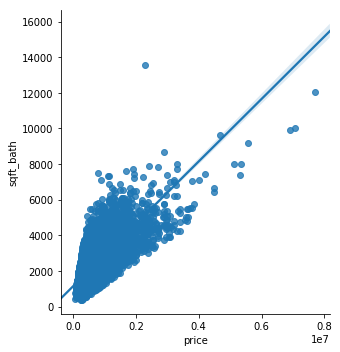

In [54]:
sns.lmplot(x='price', y='sqft_bath', data=df_final)

In [65]:
#### looks like we have some outliers that may be skewing the data.  We will take a look at that here:
removedf = df_final.loc[(df_final.sqft_bath > 10000) & (df_final.price > 500000)]
df_test = df_sqft_bath.iloc[(index not in removedf.index for index in df_final.index)]
sns.lmplot(x='price', y='sqft_bath', data=df_test)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'generator'

In [66]:
df_final.head()

,price,log_sqft_lot,log_yr_built,bed1,bed2,bed4,flor1,flor2,vw1,vw2,vw4,vw5,water1,cond2,cond3,cond4,sqft_bath,sqft_grade
0,221900.0,0.295858,0.485598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1,538000.0,0.326644,0.450745,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2570.0,8.0
2,180000.0,0.366664,0.293018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,770.0,7.0
3,604000.0,0.280700,0.572419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1960.0,7.0
4,510000.0,0.340224,0.761879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1680.0,9.0


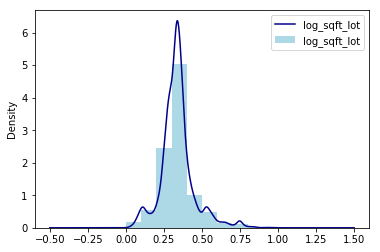

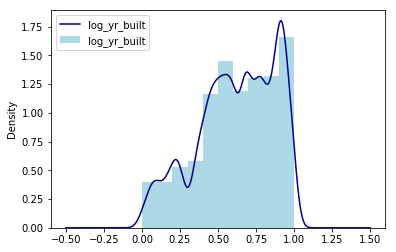

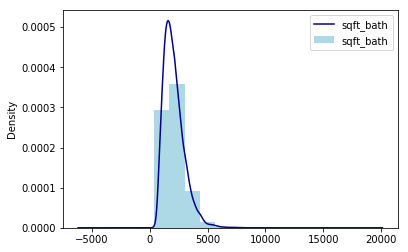

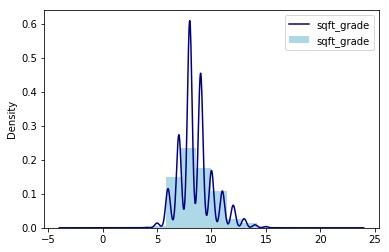

In [67]:
for column in ['log_sqft_lot', 'log_yr_built', 'sqft_bath', 'sqft_grade']:
    df_final[column].plot.hist(normed=True, color='lightblue' )
    df_final[column].plot.kde(label=column, color='darkblue' )
    plt.legend()
    plt.show()

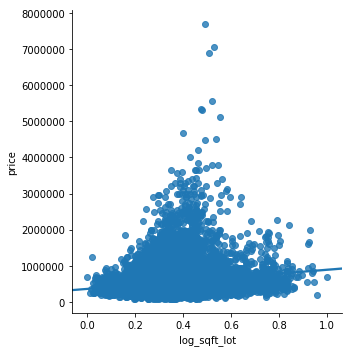

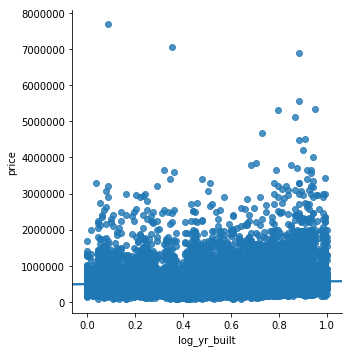

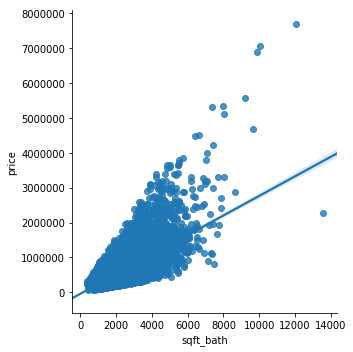

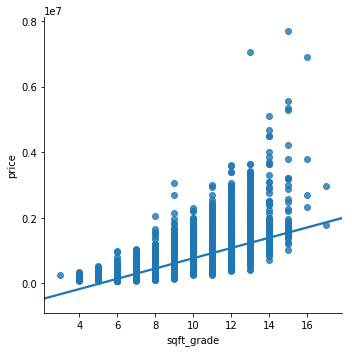

In [80]:
for column in ['log_sqft_lot', 'log_yr_built', 'sqft_bath', 'sqft_grade']:
    sns.lmplot(x=column, y="price",
                  data=df_final)
    plt.show()

In [ ]:
df_final.fillna(0, inplace=True)
df_final = df_final['sqft_grade'].fillna(0)

In [68]:
#df_final.drop(['bed1', 'bed2', 'bed4'], axis=1, inplace=True)

In [69]:
# x = df_final['price']
# y = df_final['water1']
# sns.catplot(x=x, y=y,
#             kind="box", dodge=False, data=df_final);

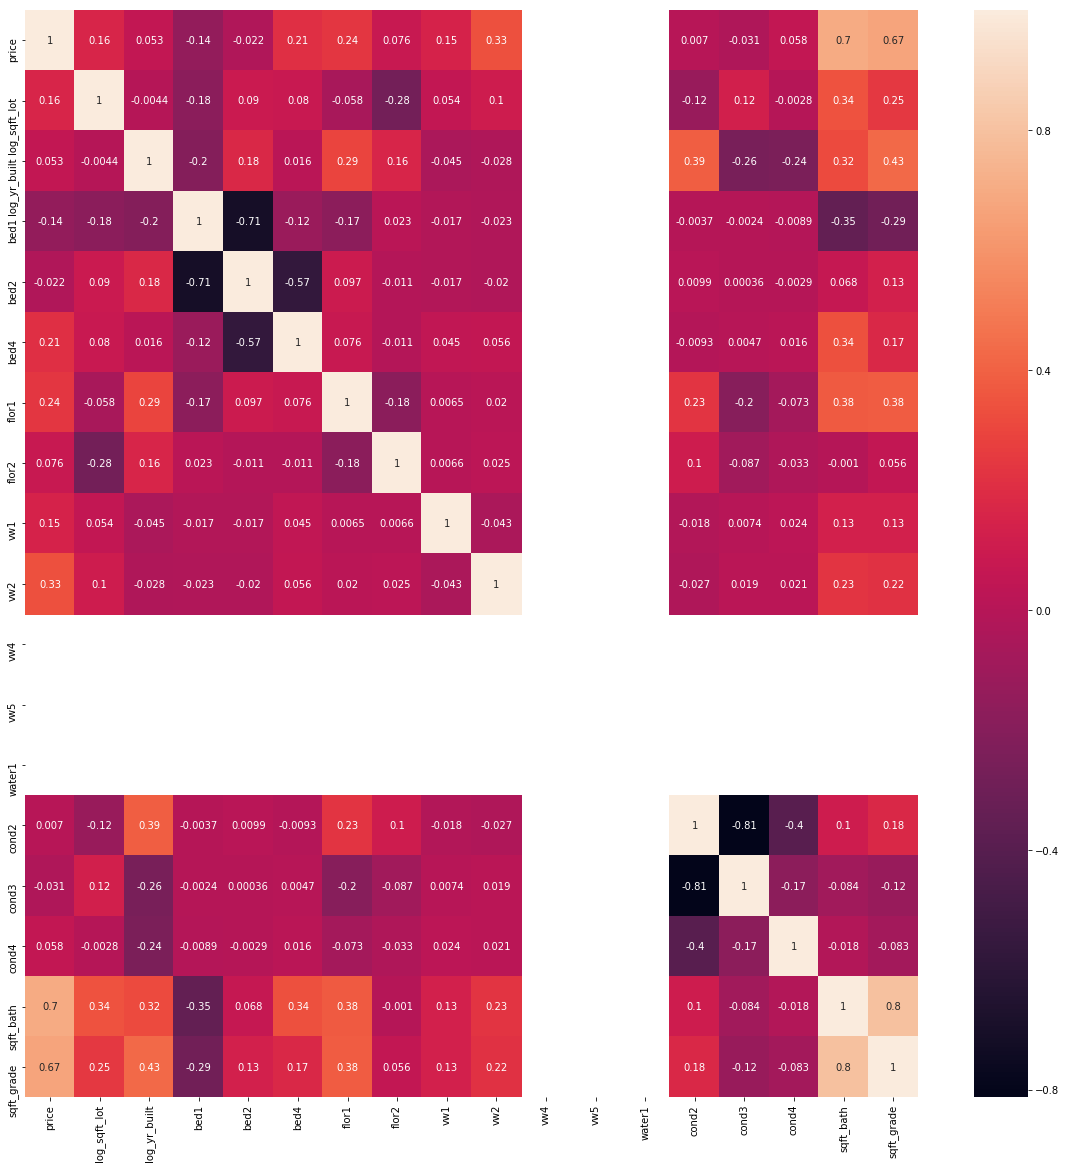

In [70]:
corr = df_final.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,)
plt.show()

In [71]:
df_final.head()

,price,log_sqft_lot,log_yr_built,bed1,bed2,bed4,flor1,flor2,vw1,vw2,vw4,vw5,water1,cond2,cond3,cond4,sqft_bath,sqft_grade
0,221900.0,0.295858,0.485598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1,538000.0,0.326644,0.450745,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2570.0,8.0
2,180000.0,0.366664,0.293018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,770.0,7.0
3,604000.0,0.280700,0.572419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1960.0,7.0
4,510000.0,0.340224,0.761879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1680.0,9.0


In [72]:
col_names = df_final.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_final).fit()
    X_new = pd.DataFrame({val: [df_final[val].min(), df_final[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Price~log_sqft_lot
------------------------------
['log_sqft_lot', 0.02610350357589164, 360271.62589661265, 530540.9533413518, 3.1507291785410016e-126]
Price~log_yr_built
------------------------------
['log_yr_built', 0.002779297477930709, 492936.5773695016, 76084.27111925143, 9.023557187515946e-15]
Price~bed1
------------------------------
['bed1', 0.0209483450131297, 560645.3023996607, -159257.5552982118, 2.0016378518991353e-101]
Price~bed2
------------------------------
['bed2', 0.0004631741508146492, 554905.4725971328, -18891.026469996854, 0.0015621178257801448]
Price~bed4
------------------------------
['bed4', 0.04477142490602559, 516337.64990113035, 276197.12265627104, 4.2405190778024106e-217]
Price~flor1
------------------------------
['flor1', 0.05546952604415922, 458852.9825342771, 173361.86172398156, 5.8786143636138905e-270]
Price~flor2
------------------------------
['flor2', 0.005812426454530173, 534873.9549887109, 150201.753612062, 3.271753017935601e-29]
Price~vw1
------

In [73]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,log_sqft_lot,0.0261035,360272,530541,3.15073e-126
2,log_yr_built,0.0027793,492937,76084.3,9.02356e-15
3,bed1,0.0209483,560645,-159258,2.00164e-101
4,bed2,0.000463174,554905,-18891,0.00156212
5,bed4,0.0447714,516338,276197,4.24052e-217
6,flor1,0.0554695,458853,173362,5.87861e-270
7,flor2,0.00581243,534874,150202,3.27175e-29
8,vw1,0.0216626,528649,262741,7.45133e-105
9,vw2,0.11208,515781,641626,0


In [74]:
y = df_final[['price']]
X = df_final.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [75]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17278 4320 17278 4320


In [76]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
linreg.fit(X_train, y_train)

In [ ]:
print(linreg.intercept_)

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(metrics.mean_squared_error(y_train, y_hat_train))
    test_err.append(metrics.mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [ ]:
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [ ]:
print(cv_5_results)

In [ ]:
df_final.head()

In [ ]:

y = df_final.price
X = df_final.logsqft_living
sm.add_constant(X)
sm.OLS(y, X).fit()
results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
pd.DataFrame(results)


In [ ]:
target = 'price'
x_cols = df_final.drop('price', axis=1).columns
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(df.price, df.lat,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(df.price, df.long,
                 cmap="Blues", shade=True, shade_lowest=False)